• **DOMAIN**: Health Care

• **CONTEXT**:
Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation
of the lungs. In this challenge, you’re required to build an algorithm to detect a visual signal for pneumonia in medical
images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

• **DATA DESCRIPTION**:
- In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was
determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the
appearance of true pneumonia. Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They
contain a combination of header metadata as well as underlying raw image arrays for pixel data.
- Dataset has been attached along with this project. Please use the same for this capstone project.
- Original link to the dataset : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data [ for your reference
only ]. You can refer to the details of the dataset in the above link
- Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.

• **PROJECT OBJECTIVE**: Design a DL based algorithm for detecting pneumonia

#**PROJECT TASK**

##**Milestone 1**

**Process**:
1. Import the data.
2. Map training and testing images to its classes.
3. Map training and testing images to its annotations.
4. Preprocessing and Visualisation of different classes
5. Display images with bounding box.
6. Design, train and test basic CNN models for classification.
7. Interim report

**Import the data**

In [ ]:
from PIL import Image
from glob import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import scipy.stats as stats
import seaborn as sns

#from keras import Sequential
#from keras.layers import Conv2D # swipe across the image by 1
#from keras.layers import Dense, Dropout # construct each layer
#from keras.layers import Flatten, GlobalAveragePooling2D,GlobalMaxPooling2D
#from keras.layers import MaxPooling2D # swipe across by pool size
#from keras.models import Sequential  # initial NN

from skimage.transform import resize
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

#import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras import losses
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.applications import MobileNet , VGG19
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization ,Conv2DTranspose
from tensorflow.keras.layers import Dense, Flatten,Dropout,MaxPooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import warnings
np.random.seed(1)
random.seed(1)
#tf.random.set_seed(1)
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/My Drive/AIML/Capstone Project/'

train_labels=pd.read_csv(data_dir +'stage_2_train_labels.csv')

In [ ]:
print(train_labels.info())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB
None




In [ ]:
## Getting the first 5000 data set for traingin and the next 5000 for validations
train_CombinedData = train_labels[0:5000]
validate_CombinedData = train_labels[5000:10000]

train_CombinedData.fillna(0, inplace=True)
validate_CombinedData.fillna(0, inplace=True)


In [ ]:
## Checking training data distuburtion , they have almos the same target distubution
train_CombinedData.Target.value_counts()

0    2633
1    2367
Name: Target, dtype: int64

In [ ]:
!unzip "/content/drive/My Drive/AIML/Capstone Project/stage_2_train_images.zip" -d "/content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images/f868de0f-be9e-4da2-aee7-b0bc5b66e086.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/__MACOSX/stage_2_train_images/._f868de0f-be9e-4da2-aee7-b0bc5b66e086.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images/bfdbe64f-1ab9-4b72-a4b5-3ef6a057add2.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/__MACOSX/stage_2_train_images/._bfdbe64f-1ab9-4b72-a4b5-3ef6a057add2.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images/4dbc44ca-694a-4814-9a24-bc60c8d8d611.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/__MACOSX/stage_2_train_images/._4dbc44ca-694a-4814-9a24-bc60c8d8d611.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone P

In [ ]:
!unzip "/content/drive/My Drive/AIML/Capstone Project/stage_2_test_images.zip" -d "/content/drive/My Drive/AIML/Capstone Project/stage_2_test_images/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_test_images/stage_2_test_images/2836c671-b555-4af7-b1c2-25d73cb113f1.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_test_images/__MACOSX/stage_2_test_images/._2836c671-b555-4af7-b1c2-25d73cb113f1.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_test_images/stage_2_test_images/1e2c8423-ba80-47dc-b590-841c472cbc27.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_test_images/__MACOSX/stage_2_test_images/._1e2c8423-ba80-47dc-b590-841c472cbc27.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_test_images/stage_2_test_images/1eda3687-bdf5-469f-8fba-5000c559f48b.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage_2_test_images/__MACOSX/stage_2_test_images/._1eda3687-bdf5-469f-8fba-5000c559f48b.dcm  
  inflating: /content/drive/My Drive/AIML/Capstone Project/stage

# Creating Custom Train Generator. This will read the files in batches of 10 while training the model

In [ ]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from keras.models import Sequential  # initial NN
from keras.utils import Sequence  # Add this line to import the Sequence class
import math
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
import cv2

BATCH_SIZE = 5
## Image Size to be scaled
IMAGE_SIZE = 128
## Actual Image size
IMG_WIDTH = 1024
IMG_HEIGHT = 1024

class TrainGenerator(Sequence):

    def __init__(self,  _labels):
        self.pids = _labels["patientId"].to_numpy()
        self.coords = _labels[["x", "y", "width", "height"]].to_numpy()
        self.coords = self.coords * IMAGE_SIZE / IMG_WIDTH

    def __len__(self):
        return math.ceil(len(self.coords) / BATCH_SIZE)


    """
    The contrast of an image is enhanced when various shades in the image becomes more distinct.
    We can do so by darkening the shades of the darker pixels and vice versa.
    This is equivalent to widening the range of pixel intensities. To have a good contrast,
    the following histogram characteristics are desirable:

    1) the pixel intensities are uniformly distributed across the full range of values (each intensity value is equally probable), and
    2) the cumulative histogram is increasing linearly across the full intensity range.

    Histogram equalization modifies the distribution of pixel intensities to achieve these characteristics.
    """

    def __doHistogramEqualization(self,img):
        # Pre processing Histogram equalization
        histogram_array = np.bincount(img.flatten(), minlength=256)
        #normalize
        num_pixels = np.sum(histogram_array)
        histogram_array = histogram_array/num_pixels
        #normalized cumulative histogram
        chistogram_array = np.cumsum(histogram_array)
        """
        STEP 2: Pixel mapping lookup table
        """
        transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
        """
        STEP 3: Transformation
        """
        img_list = list(img.flatten())

        # transform pixel values to equalize
        eq_img_list = [transform_map[p] for p in img_list]

        # reshape and write back into img_array
        img = np.reshape(np.asarray(eq_img_list), img.shape)

        return img

    def __getitem__(self, idx): # Get a batch
        batch_coords = self.coords[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE] # Image coords
        batch_pids = self.pids[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE] # Image pids

        batch_images = np.zeros((len(batch_pids), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
        batch_masks = np.zeros((len(batch_pids), IMAGE_SIZE, IMAGE_SIZE))
        for _indx, _pid in enumerate(batch_pids):
          _path = '/content/drive/MyDrive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images/'+'{}.dcm'.format(_pid)
          _imgData = dcm.read_file(_path)

          img = _imgData.pixel_array
  #             img = np.stack((img,)*3, axis=-1) # Expand grayscale image to contain 3 channels

          # Resize image
          resized_img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE), interpolation = cv2.INTER_AREA)

          resized_img = self.__doHistogramEqualization(resized_img)

          batch_images[_indx][:,:,0] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32))
          batch_images[_indx][:,:,1] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32))
          batch_images[_indx][:,:,2] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32))
          x = int(batch_coords[_indx, 0])
          y = int(batch_coords[_indx, 1])
          width = int(batch_coords[_indx, 2])
          height = int(batch_coords[_indx, 3])

          batch_masks[_indx][y:y+height, x:x+width] = 1

        return batch_images, batch_masks

In [ ]:
trainUNetDataGen = TrainGenerator( train_CombinedData)
validateUNetDataGen = TrainGenerator( validate_CombinedData)

In [ ]:
# To show image with mask
def showMaskedImage(_imageSet, _maskSet, _index) :
    maskImage = _imageSet[_index]

    maskImage[:,:,0] = _maskSet[_index] * _imageSet[_index][:,:,0]
    maskImage[:,:,1] = _maskSet[_index] * _imageSet[_index][:,:,1]
    maskImage[:,:,2] = _maskSet[_index] * _imageSet[_index][:,:,2]

    plt.imshow(maskImage[:,:,0])

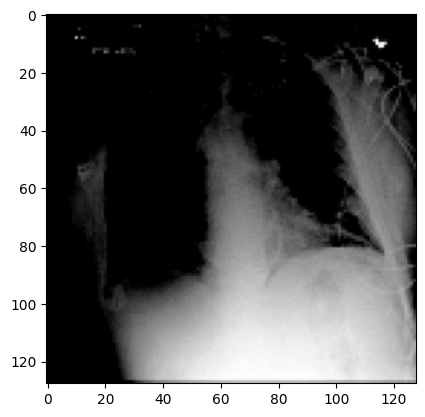

In [ ]:
## One of the pre processed image from custom train generotr
imageSet0 = trainUNetDataGen[1][0][1]
plt.imshow(imageSet0)

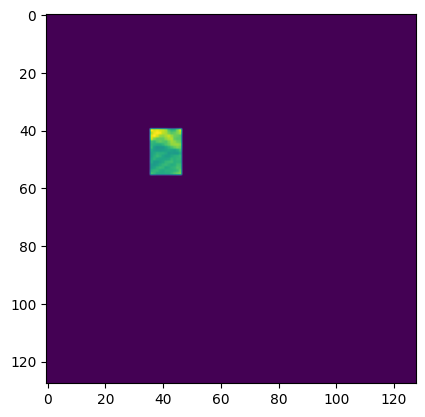

In [ ]:
## Masks for the same
imageSet0 = trainUNetDataGen[2][0]
maskSet0 = trainUNetDataGen[2][1]
showMaskedImage(imageSet0, maskSet0, 4)

In [ ]:
ALPHA = 1.0
def create_UNetModelUsingMobileNet(trainable=True):
    """Function to create UNet architecture with MobileNet.

    Arguments:
        trainable -- Flag to make layers trainable. Default value is 'True'.
    """
    # Get all layers with 'imagenet' weights
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    # Top layer is last layer of the model

    # Make all layers trainable
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    convLayer_112by112 = model.get_layer("conv_pw_1_relu").output
    convLayer_56by56 = model.get_layer("conv_pw_3_relu").output
    convLayer_28by28 = model.get_layer("conv_pw_5_relu").output
    convLayer_14by14 = model.get_layer("conv_pw_11_relu").output
    convLayer_7by7 = model.get_layer("conv_pw_13_relu").output
    # The last layer of mobilenet model is of dimensions (7x7x1024)

    # Start upsampling from 7x7 to 14x14 ...up to 224x224 to form UNET
    # concatinate with the original image layer of the same size from MobileNet
    x = Concatenate()([UpSampling2D()(convLayer_7by7), convLayer_14by14])
    x = Concatenate()([UpSampling2D()(x), convLayer_28by28])
    x = Concatenate()([UpSampling2D()(x), convLayer_56by56])
    x = Concatenate()([UpSampling2D()(x), convLayer_112by112])
    x = UpSampling2D(name="unet_last")(x) # upsample to 224x224

    # Add classification layer
    x = Conv2D(1, kernel_size=1, activation="sigmoid", name="masks")(x)
    x = Reshape((IMAGE_SIZE, IMAGE_SIZE))(x)

    return Model(inputs=model.input, outputs=x)

In [ ]:
## Build a model
input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)
model = create_UNetModelUsingMobileNet(input_shape)
model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_3[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 32)           128       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)         

In [ ]:
#dice_coef 2 * the Area of Overlap divided by the total number of pixels in both images
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + tf.keras.backend.epsilon()) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + tf.keras.backend.epsilon())

## Loss is 1 - the coefficent of two images
def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [ ]:
## Call Backs for ealy stopping and reduce learning rate
## Reduce the learning rate when teh validation loss is same for 4 epocs
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
]

In [ ]:
LR = 1e-4
## Optimiser , metrics and loss for the model
opt = tf.keras.optimizers.Nadam(LR)
metrics = [dice_coef, Recall(), Precision()]
model.compile(loss=dice_loss, optimizer=opt, metrics=metrics)


In [ ]:
## Running the model
train_steps = len(trainUNetDataGen)//BATCH_SIZE
valid_steps = len(validateUNetDataGen)//BATCH_SIZE

if len(trainUNetDataGen) % BATCH_SIZE != 0:
    train_steps += 1
if len(validateUNetDataGen) % BATCH_SIZE != 0:
    valid_steps += 1

history = model.fit(trainUNetDataGen, epochs=16,steps_per_epoch=train_steps,
                        validation_data=validateUNetDataGen,
                        callbacks=callbacks,
                        use_multiprocessing=True,workers=4,
                        validation_steps=valid_steps,shuffle=True)


Epoch 1/16
200/200 [==============================] - 37s 67ms/step - loss: 0.8147 - dice_coef: 0.1853 - recall_2: 0.5739 - precision_2: 0.1025 - val_loss: 0.9025 - val_dice_coef: 0.0975 - val_recall_2: 0.3121 - val_precision_2: 0.1412 - lr: 1.0000e-04
Epoch 2/16
200/200 [==============================] - 13s 62ms/step - loss: 0.7556 - dice_coef: 0.2444 - recall_2: 0.4883 - precision_2: 0.2138 - val_loss: 0.8734 - val_dice_coef: 0.1266 - val_recall_2: 0.5263 - val_precision_2: 0.1524 - lr: 1.0000e-04
Epoch 3/16
200/200 [==============================] - 13s 63ms/step - loss: 0.7167 - dice_coef: 0.2833 - recall_2: 0.4522 - precision_2: 0.2634 - val_loss: 0.8881 - val_dice_coef: 0.1119 - val_recall_2: 0.2991 - val_precision_2: 0.2492 - lr: 1.0000e-04
Epoch 4/16
200/200 [==============================] - 13s 62ms/step - loss: 0.7012 - dice_coef: 0.2988 - recall_2: 0.4679 - precision_2: 0.2871 - val_loss: 0.8535 - val_dice_coef: 0.1465 - val_recall_2: 0.4859 - val_precision_2: 0.1975 - lr:

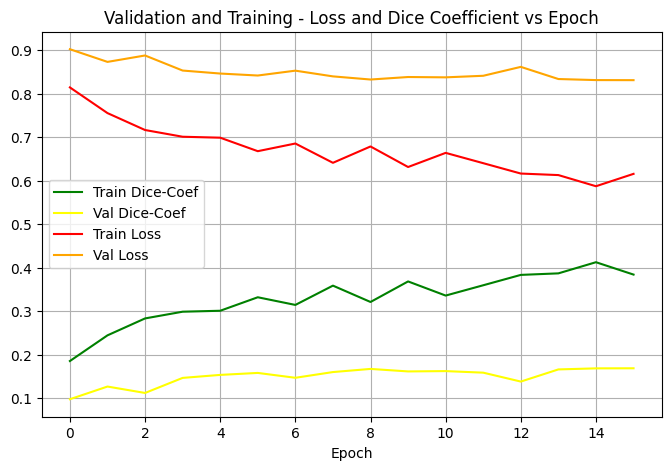

In [ ]:
## PLot Matrix between training and validation data
plt.figure(figsize=(8, 5))
plt.grid(True)
plt.plot(history.history['dice_coef'],     label='Train Dice-Coef',      color = "green" );
plt.plot(history.history['val_dice_coef'], label='Val Dice-Coef',  color = "yellow");
plt.plot(history.history['loss'],         label='Train Loss',          color = "red"   );
plt.plot(history.history['val_loss'],     label='Val Loss',      color = "orange");
plt.title("Validation and Training - Loss and Dice Coefficient vs Epoch")
plt.xlabel("Epoch")
plt.legend();

val_dice-oefficient value is very low and pretty much a flat curve, indicating underfitting indicating model has not learnt sufficiently. It is steadily increasing, not sufficient training(more epochs needed).  

We have used an image size of 128x128 as against the original size of 1024x1024. Using a higher resolution, could also improve training capacity

<li>Hyper-parameter tuning, image_augmentation, using different architectures will help in increasing model performance and generalization.


In [ ]:
##Preparing test data , picked up random 20 images
test_CombinedData = train_labels[15000:15020]
test_CombinedData.fillna(0, inplace=True)

In [ ]:
##Check target distrubution in test dataset, there are both the classes available with equal sdistrubution
test_CombinedData.Target.value_counts()

0    10
1    10
Name: Target, dtype: int64

In [ ]:
## Setting the custom generator for test data
testUNetDataGen = TrainGenerator(test_CombinedData)

In [ ]:
## evaluating the model
test_steps = (len(testUNetDataGen)//BATCH_SIZE)
if len(testUNetDataGen) % BATCH_SIZE != 0:
    test_steps += 1

model.evaluate(testUNetDataGen)

4/4 [==============================] - 0s 69ms/step - loss: 0.5557 - dice_coef: 0.4443 - recall_2: 0.4515 - precision_2: 0.4858


[0.5556878447532654,
 0.44431212544441223,
 0.4515080749988556,
 0.4857954680919647]

In [ ]:
## Precidt the test data that we have
pred_mask = model.predict(testUNetDataGen)

4/4 [==============================] - 1s 61ms/step


In [ ]:
pred_mask

array([[[6.04719546e-08, 6.04719546e-08, 3.88419643e-08, ...,
         4.43171189e-09, 3.42652151e-09, 3.42652151e-09],
        [6.04719546e-08, 6.04719546e-08, 3.88419643e-08, ...,
         4.43171189e-09, 3.42652151e-09, 3.42652151e-09],
        [5.03427628e-08, 5.03427628e-08, 3.36887318e-08, ...,
         5.49506796e-09, 5.45392753e-09, 5.45392753e-09],
        ...,
        [2.14510891e-07, 2.14510891e-07, 1.23146606e-07, ...,
         2.21622365e-08, 1.23870585e-08, 1.23870585e-08],
        [1.43608190e-07, 1.43608190e-07, 2.13097465e-07, ...,
         2.78291843e-08, 1.13269216e-08, 1.13269216e-08],
        [1.43608190e-07, 1.43608190e-07, 2.13097465e-07, ...,
         2.78291843e-08, 1.13269216e-08, 1.13269216e-08]],

       [[1.86328839e-06, 1.86328839e-06, 1.61033540e-06, ...,
         5.13120924e-08, 3.34246479e-08, 3.34246479e-08],
        [1.86328839e-06, 1.86328839e-06, 1.61033540e-06, ...,
         5.13120924e-08, 3.34246479e-08, 3.34246479e-08],
        [2.63140237e-06, 

In [ ]:
test_CombinedData = test_CombinedData.reset_index()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []
y_True = []
imageList = []
predMaskTemp = []
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
def getPredictions(test_CombinedData):
    masks = np.zeros((int(test_CombinedData.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))

    for index, row in test_CombinedData.iterrows():
        patientId = row.patientId
        print(patientId)

        classlabel = row["Target"]
        dcm_file = '/content/drive/MyDrive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images/'+'{}.dcm'.format(patientId)
        dcm_data = dcm.read_file(dcm_file)
        img = dcm_data.pixel_array
        resized_img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH), interpolation = cv2.INTER_LINEAR)
        predMaskTemp.append(pred_mask[index])
        iou = (pred_mask[index] > 0.5) * 1.0
        y_pred.append((1 in iou) * 1)
        imageList.append(resized_img)
        y_True.append(classlabel)
        x_scale = IMAGE_HEIGHT / 1024
        y_scale = IMAGE_WIDTH / 1024

        if(classlabel == 1):
            x = int(np.round(row['x'] * x_scale))
            y = int(np.round(row['y'] * y_scale))
            w = int(np.round(row['width'] * x_scale))
            h = int(np.round(row['height'] * y_scale))
            masks[index][y:y+h, x:x+w] = 1



    tmpImages = np.array(imageList)
    tmpMask = np.array(predMaskTemp)
    originalMask = np.array(masks)
    return (y_True,y_pred,tmpImages,tmpMask ,originalMask)

def print_confusion_matrix(y_true, y_pred):
    '''Function to print confusion_matrix'''

    # Get confusion matrix array
    array = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(array, range(2), range(2))

    print("Total samples = ", len(test_CombinedData))

    # Plot heatmap and get sns heatmap values
    sns.set(font_scale=1.4); # for label size
    result = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', cbar=False);

    # Add labels to heatmap
    labels = ['TN=','FP=','FN=','TP=']
    i=0
    for t in result.texts:
        t.set_text(labels[i] + t.get_text())
        i += 1

    plt.xlabel("Predicted Values")
    plt.ylabel('True Values')
    plt.show()
    return

In [ ]:
## Create predictions map
y_true,y_pred ,imagelist , maskList , originalMask = getPredictions(test_CombinedData)

934d2f15-76ae-4a2c-817f-a3b022b0cc10
934de9ea-b41c-45cf-a6f0-93f93cc7940e
934e5ecd-c6e7-4c9d-8855-836227bde5f8
9353a231-323a-469f-a7ad-706f900b1202
9353a231-323a-469f-a7ad-706f900b1202
93550df9-7f67-404f-a974-516acecd5c48
9358d1c5-ba61-4150-a233-41138208a3f9
935a25a1-3573-47b7-b91f-b3852b9a8f11
935f4fd2-337a-4a58-9004-2c56af697428
9363ce31-c17d-4287-ba3e-39ea2884a3cf
9363ce31-c17d-4287-ba3e-39ea2884a3cf
9366e300-5b42-42e4-98b1-48a8c821f679
936cae03-d766-4566-a42b-0e6b3360d2a4
936e16c0-f39a-4970-903f-6af6722c26b4
936f2425-bc13-49ce-a4a1-979fd314ab48
936f2425-bc13-49ce-a4a1-979fd314ab48
936f68b6-a40e-4bd7-bc4e-60ad12a4b31b
93708fca-e95a-40b8-9c7f-e99c8ccf10fd
93711eaf-7c5a-49e7-a5f3-b06922e0fa9b
93727b85-2fa2-478d-aecc-46e14f391dd5


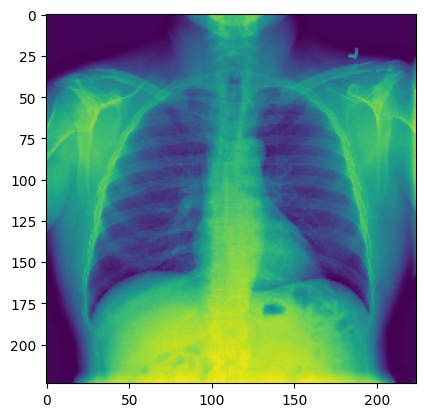

In [ ]:

dcm_file = '/content/drive/MyDrive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images/'+'{}.dcm'.format('936f68b6-a40e-4bd7-bc4e-60ad12a4b31b')
dcm_data = dcm.read_file(dcm_file)
img = dcm_data.pixel_array
plt.imshow(imagelist[12])

Text(0.5, 0, 'Pneumonia 1:')

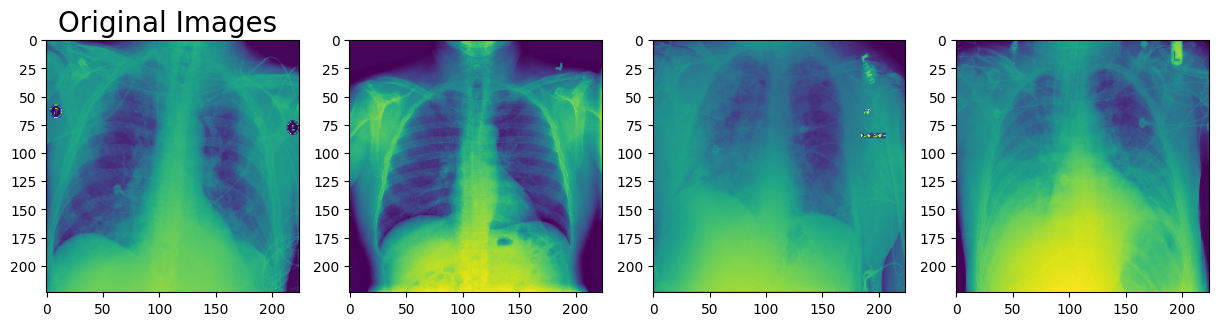

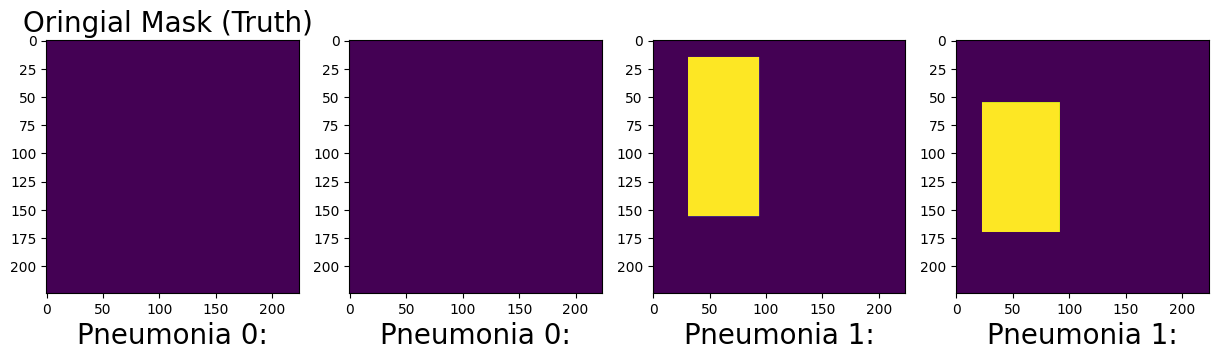

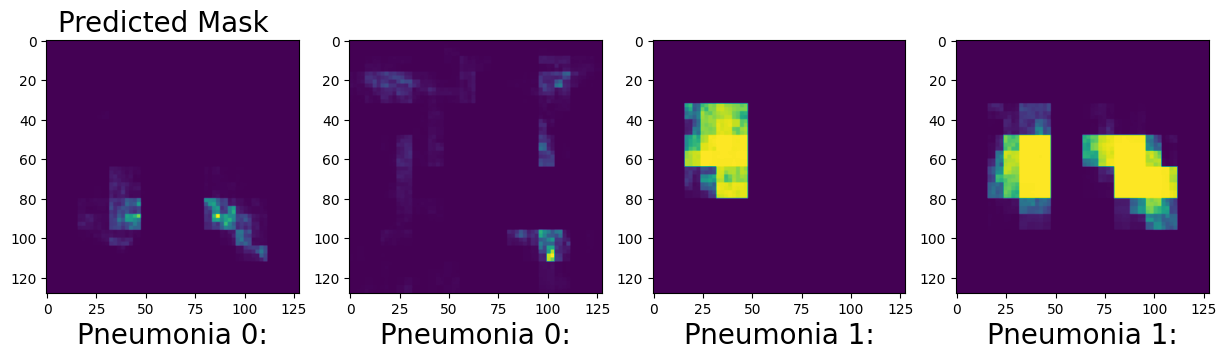

In [ ]:
## Visualising the train and output data
fig = plt.figure(figsize=(15, 15))

a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(imagelist[1])
a.set_title('Original Images ',fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(imagelist[12])

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(imagelist[13])

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(imagelist[15])

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)

imgplot = plt.imshow(originalMask[1])
a.set_title('Oringial Mask (Truth) ',fontsize=20)

a.set_xlabel('Pneumonia {}:'.format(y_true[1]), fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(originalMask[12])
a.set_xlabel('Pneumonia {}:'.format(y_true[12]), fontsize=20)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(originalMask[13])
a.set_xlabel('Pneumonia {}:'.format(y_true[13]), fontsize=20)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(originalMask[15])
a.set_xlabel('Pneumonia {}:'.format(y_true[15]), fontsize=20)


fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
a.set_title('Predicted Mask  ',fontsize=20)
imgplot = plt.imshow(maskList[1])
a.set_xlabel('Pneumonia {}:'.format(y_pred[1]), fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(maskList[12])
a.set_xlabel('Pneumonia {}:'.format(y_pred[12]), fontsize=20)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(maskList[13])
a.set_xlabel('Pneumonia {}:'.format(y_pred[13]), fontsize=20)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(maskList[15])
a.set_xlabel('Pneumonia {}:'.format(y_pred[15]), fontsize=20)


# we could see that the first & Second is mis-classifed
# Thrid is predcited correctly and the bouding box is also almost at the same position
# fourth is predicted correctly but there are two boudnign boxes, this culd be because there are duplicate patient id and we are picking only one mask to display inte Truth

Total samples =  20


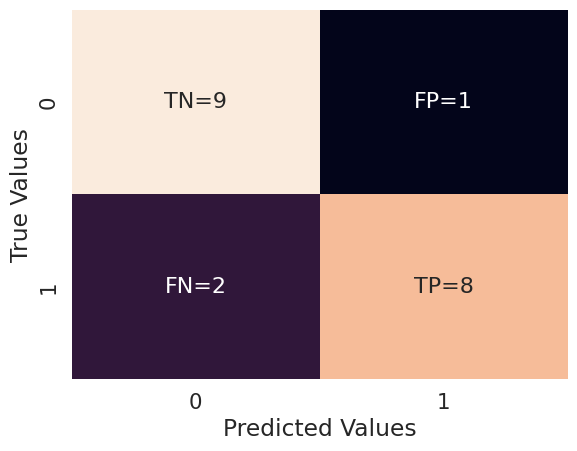

In [ ]:
print_confusion_matrix(y_true,y_pred )
## There are two False Postive for Target 1

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



**Mask-RCNN Starter Model for the RSNA Pneumonia Detection Challenge with transfer learning **

Using pre-trained COCO weights trained on http://cocodataset.org as in https://github.com/matterport/Mask_RCNN/tree/master/samples/balloon

### Install Matterport's Mask-RCNN model from github.
See the [Matterport's implementation of Mask-RCNN](https://github.com/matterport/Mask_RCNN).

In [ ]:
#!git clone https://www.github.com/matterport/Mask_RCNN.git
!git clone https://github.com/akTwelve/Mask_RCNN.git
os.chdir('Mask_RCNN')
#!python setup.py -q install

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 979, done.
remote: Total 979 (delta 0), reused 0 (delta 0), pack-reused 979
Receiving objects: 100% (979/979), 137.72 MiB | 36.35 MiB/s, done.
Resolving deltas: 100% (570/570), done.


In [ ]:
import os
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd
import glob
from sklearn.model_selection import KFold


DATA_DIR = '/capstone/input'
print(DATA_DIR)
# Directory to save logs and trained model
ROOT_DIR = '/content/drive/My Drive/AIML/Capstone Project'
print(ROOT_DIR)

# Import Mask RCNN
sys.path.append(os.path.join(ROOT_DIR, 'Mask_RCNN'))  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

/capstone/input
/content/drive/My Drive/AIML/Capstone Project


In [ ]:
train_dicom_dir = os.path.join('/content/drive/My Drive/AIML/Capstone Project/stage_2_train_images', 'stage_2_train_images')
test_dicom_dir = os.path.join('/content/drive/My Drive/AIML/Capstone Project/stage_2_test_images/', 'stage_2_test_images')

In [ ]:
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

COCO_WEIGHTS_PATH = "mask_rcnn_coco.h5"

-rw-r--r-- 1 root root 246M Dec  6  2021 mask_rcnn_coco.h5


### Setup functions and classes for Mask-RCNN

- dicom_fps is a list of the dicom image path and filenames
- image_annotions is a dictionary of the annotations keyed by the filenames
- parsing the dataset returns a list of the image filenames and the annotations dictionary

In [ ]:
def get_dicom_fps(dicom_dir):
    dicom_fps = glob.glob(dicom_dir+'/'+'*.dcm')
    return list(set(dicom_fps))

def parse_dataset(dicom_dir, anns):
    image_fps = get_dicom_fps(dicom_dir)
    image_annotations = {fp: [] for fp in image_fps}
    for index, row in anns.iterrows():
        fp = os.path.join(dicom_dir, row['patientId']+'.dcm')
        image_annotations[fp].append(row)
    return image_fps, image_annotations

In [ ]:
# The following parameters have been selected to reduce running time
class DetectorConfig(Config):
    """Configuration for training pneumonia detection on the RSNA pneumonia dataset.
    Overrides values in the base Config class.
    """
    # Give the configuration a recognizable name
    NAME = 'pneumonia'

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8

    BACKBONE = 'resnet50'
    #BACKBONE = 'resnet34'

    NUM_CLASSES = 2  # background + 1 pneumonia classes

    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256
    RPN_ANCHOR_SCALES = (16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 4
    DETECTION_MAX_INSTANCES = 3
    DETECTION_MIN_CONFIDENCE = 0.78  ## match target distribution
    DETECTION_NMS_THRESHOLD = 0.01

    STEPS_PER_EPOCH = 200

config = DetectorConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        3
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [ ]:
class DetectorDataset(utils.Dataset):
    """Dataset class for training pneumonia detection on the RSNA pneumonia dataset.
    """

    def __init__(self, image_fps, image_annotations, orig_height, orig_width):
        super().__init__(self)

        # Add classes
        self.add_class('pneumonia', 1, 'Lung Opacity')

        # add images
        for i, fp in enumerate(image_fps):
            annotations = image_annotations[fp]
            self.add_image('pneumonia', image_id=i, path=fp,
                           annotations=annotations, orig_height=orig_height, orig_width=orig_width)

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        ds = pydicom.read_file(fp)
        image = ds.pixel_array
        # If grayscale. Convert to RGB for consistency.
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
        count = len(annotations)
        if count == 0:
            mask = np.zeros((info['orig_height'], info['orig_width'], 1), dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['orig_height'], info['orig_width'], count), dtype=np.uint8)
            class_ids = np.zeros((count,), dtype=np.int32)
            for i, a in enumerate(annotations):
                if a['Target'] == 1:
                    x = int(a['x'])
                    y = int(a['y'])
                    w = int(a['width'])
                    h = int(a['height'])
                    mask_instance = mask[:, :, i].copy()
                    cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
                    mask[:, :, i] = mask_instance
                    class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)

### Examine the annotation data, parse the dataset, and view dicom fields

In [ ]:
# training dataset
anns = pd.read_csv('/content/drive/My Drive/AIML/Capstone Project/stage_2_train_labels.csv')
anns.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
image_fps, image_annotations = parse_dataset(train_dicom_dir, anns=anns)

In [ ]:
ds = pydicom.read_file(image_fps[0]) # read dicom image from filepath
image = ds.pixel_array # get image array

In [ ]:
anns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
# show dicom fields
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.1630.1517874291.906888
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.1630.1517874291.906888
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [ ]:
#image_fps_list = list(image_fps)
#random.seed(42)
#random.shuffle(image_fps_list)
#val_size = 1500
#image_fps_val = image_fps_list[:val_size]
#image_fps_train = image_fps_list[val_size:]

#print(len(image_fps_train), len(image_fps_val))

image_fps_list = list(image_fps)
random.seed(42)
random.shuffle(image_fps_list)

# Set the number of images for training and validation
train_size = 64
val_size = 8

# Split the list into training and validation sets
image_fps_train = image_fps_list[:train_size]
image_fps_val = image_fps_list[train_size:train_size + val_size]

print(len(image_fps_train), len(image_fps_val))
# print(image_fps_val[:6])





64 8


In [ ]:
# Original DICOM image size: 1024 x 1024
ORIG_SIZE = 1024
# prepare the training dataset
dataset_train = DetectorDataset(image_fps_train, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

### Let's look at a sample annotation. We see a bounding box with (x, y) of the the top left corner as well as the width and height.

In [ ]:
# Show annotation(s) for a DICOM image
test_fp = random.choice(image_fps_train)
image_annotations[test_fp]

[patientId    eda8e69a-4bda-4772-a9a3-e896e5d2b958
 x                                             NaN
 y                                             NaN
 width                                         NaN
 height                                        NaN
 Target                                          0
 Name: 26693, dtype: object]

In [ ]:
# prepare the validation dataset
dataset_val = DetectorDataset(image_fps_val, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_val.prepare()

(1024, 1024, 3)
/content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images/dbafd69b-c2d5-44f5-a3f2-6c347ce377d2.dcm
[1]


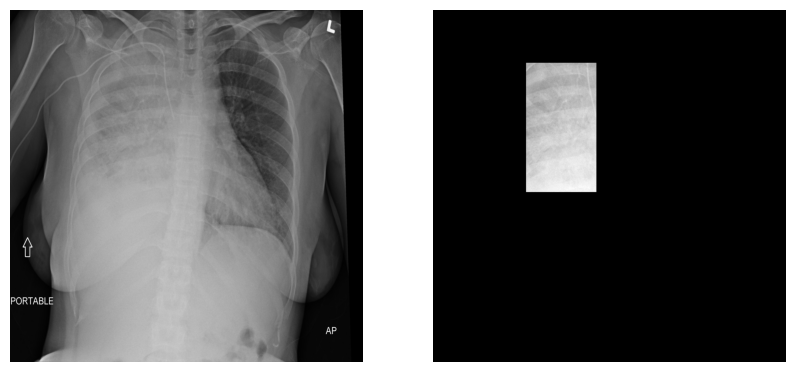

In [ ]:
# Load and display random sample and their bounding boxes
class_ids = [0]
while class_ids[0] == 0:  ## look for a mask
    image_id = random.choice(dataset_train.image_ids)
    image_fp = dataset_train.image_reference(image_id)
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)

print(image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')
plt.axis('off')

print(image_fp)
print(class_ids)

### Image Augmentation. Try finetuning some variables to custom values

In [ ]:
# Image augmentation (light but constant)
augmentation = iaa.Sequential([
    iaa.OneOf([ ## geometric transform
        iaa.Affine(
            scale={"x": (0.98, 1.02), "y": (0.98, 1.04)},
            translate_percent={"x": (-0.02, 0.02), "y": (-0.04, 0.04)},
            rotate=(-2, 2),
            shear=(-1, 1),
        ),
        iaa.PiecewiseAffine(scale=(0.001, 0.025)),
    ]),
    iaa.OneOf([ ## brightness or contrast
        iaa.Multiply((0.9, 1.1)),
        iaa.ContrastNormalization((0.9, 1.1)),
    ]),
    iaa.OneOf([ ## blur or sharpen
        iaa.GaussianBlur(sigma=(0.0, 0.1)),
        iaa.Sharpen(alpha=(0.0, 0.1)),
    ]),
])

# test on the same image as above
# imggrid = augmentation.draw_grid(image[:, :, 0], cols=5, rows=2)
#plt.figure(figsize=(30, 12))
#_ = plt.imshow(imggrid[:, :, 0], cmap='gray')

### Time to train the model. Note that training even a basic model can take a few hours.

Note: the following model is for demonstration purpose only. We have limited the training to one epoch, and have set nominal values for the Detector Configuration to reduce run-time.

- dataset_train and dataset_val are derived from DetectorDataset
- DetectorDataset loads images from image filenames and  masks from the annotation data
- model is Mask-RCNN

In [ ]:
from mrcnn import model as modellib
from mrcnn import utils

class CV1G1MaskRCNN(modellib.MaskRCNN):
    def __init__(self, mode, config, model_dir):
        super(CV1G1MaskRCNN, self).__init__(mode, config, model_dir)

In [ ]:
model = CV1G1MaskRCNN(mode='training', config=config, model_dir=ROOT_DIR)

# Exclude the last layers because they require a matching
# number of classes
model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=[
    "mrcnn_class_logits", "mrcnn_bbox_fc",
    "mrcnn_bbox", "mrcnn_mask"])

In [ ]:
LEARNING_RATE = 0.006

# Train Mask-RCNN Model
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(len(dataset_train.image_ids))
print(len(dataset_val.image_ids))



64
8


In [ ]:
%%time
## train heads with higher lr to speedup the learning
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE*2,
            epochs=2,
            layers='heads',
            augmentation=None)  ## no need to augment yet

history = model.keras_model.history.history


Starting at epoch 0. LR=0.012

Checkpoint Path: /content/drive/My Drive/AIML/Capstone Project/pneumonia20231220T0103/mask_rcnn_pneumonia_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistribut

**YOLO V3**

In [ ]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00


In [ ]:
import os
import csv
import random
import pydicom
import numpy as np
import pandas as pd
from skimage import measure
from skimage.transform import resize
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
pneumonia_locations = {}
# load table
with open(os.path.join('/content/drive/My Drive/AIML/Capstone Project/stage_2_train_labels.csv'),
          'r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [ ]:
# load and shuffle filenames
folder = '/content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 8000
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

n train samples 18684
n valid samples 8000


In [ ]:
class generator(keras.utils.Sequence):
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()

    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk

    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img

    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks

    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)

    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [ ]:
# define iou or jaccard loss function
def iou_loss(y_true, y_pred):
    #print(y_true)
    y_true=tf.cast(y_true, tf.float32)
    y_pred=tf.cast(y_pred, tf.float32)
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])

    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
BATCH_SIZE = 128
IMAGE_SIZE = 128

In [ ]:
model = create_network(input_size=IMAGE_SIZE, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam', loss=iou_bce_loss, metrics=['accuracy', mean_iou])

# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.0001
    epochs = 3
    return lr*(np.cos(np.pi*x/epochs)+1.)/2


learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

# create train and validation generators
folder = '/content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=BATCH_SIZE,
                      image_size=IMAGE_SIZE, shuffle=True, augment=False, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=BATCH_SIZE,
                      image_size=IMAGE_SIZE, shuffle=False, predict=False)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         288       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)         0         ['batch_normalization[0][0

In [ ]:
EPOCHS=5
MULTI_PROCESSING = True

history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=EPOCHS,
                              workers=4, use_multiprocessing=MULTI_PROCESSING)

Epoch 1/5
145/145 [==============================] - 739s 5s/step - loss: 0.5000 - accuracy: 0.9526 - mean_iou: 0.6571 - val_loss: 0.4447 - val_accuracy: 0.9643 - val_mean_iou: 0.7152 - lr: 1.0000e-04
Epoch 2/5
145/145 [==============================] - 738s 5s/step - loss: 0.4378 - accuracy: 0.9678 - mean_iou: 0.7201 - val_loss: 0.4349 - val_accuracy: 0.9711 - val_mean_iou: 0.7350 - lr: 7.5000e-05
Epoch 3/5
145/145 [==============================] - 768s 5s/step - loss: 0.4186 - accuracy: 0.9702 - mean_iou: 0.7355 - val_loss: 0.4233 - val_accuracy: 0.9702 - val_mean_iou: 0.7437 - lr: 2.5000e-05
Epoch 4/5
145/145 [==============================] - 729s 5s/step - loss: 0.4083 - accuracy: 0.9711 - mean_iou: 0.7470 - val_loss: 0.4225 - val_accuracy: 0.9691 - val_mean_iou: 0.7402 - lr: 0.0000e+00
Epoch 5/5
145/145 [==============================] - 750s 5s/step - loss: 0.4093 - accuracy: 0.9714 - mean_iou: 0.7470 - val_loss: 0.4245 - val_accuracy: 0.9689 - val_mean_iou: 0.7391 - lr: 2.5000

In [ ]:
model_save_path = '/content/drive/My Drive/AIML/Capstone Project/Pneumonia_model.h5'
# Save the trained model
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")

Model saved at: /content/drive/My Drive/AIML/Capstone Project/Pneumonia_model.h5


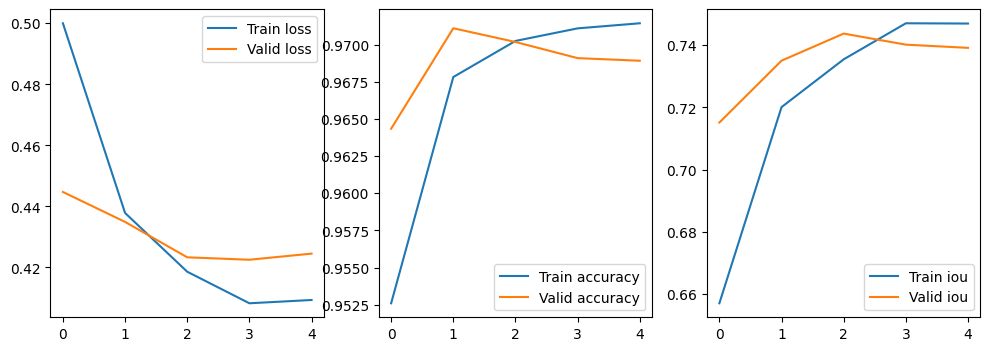

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

4/4 [==============================] - 1s 21ms/step


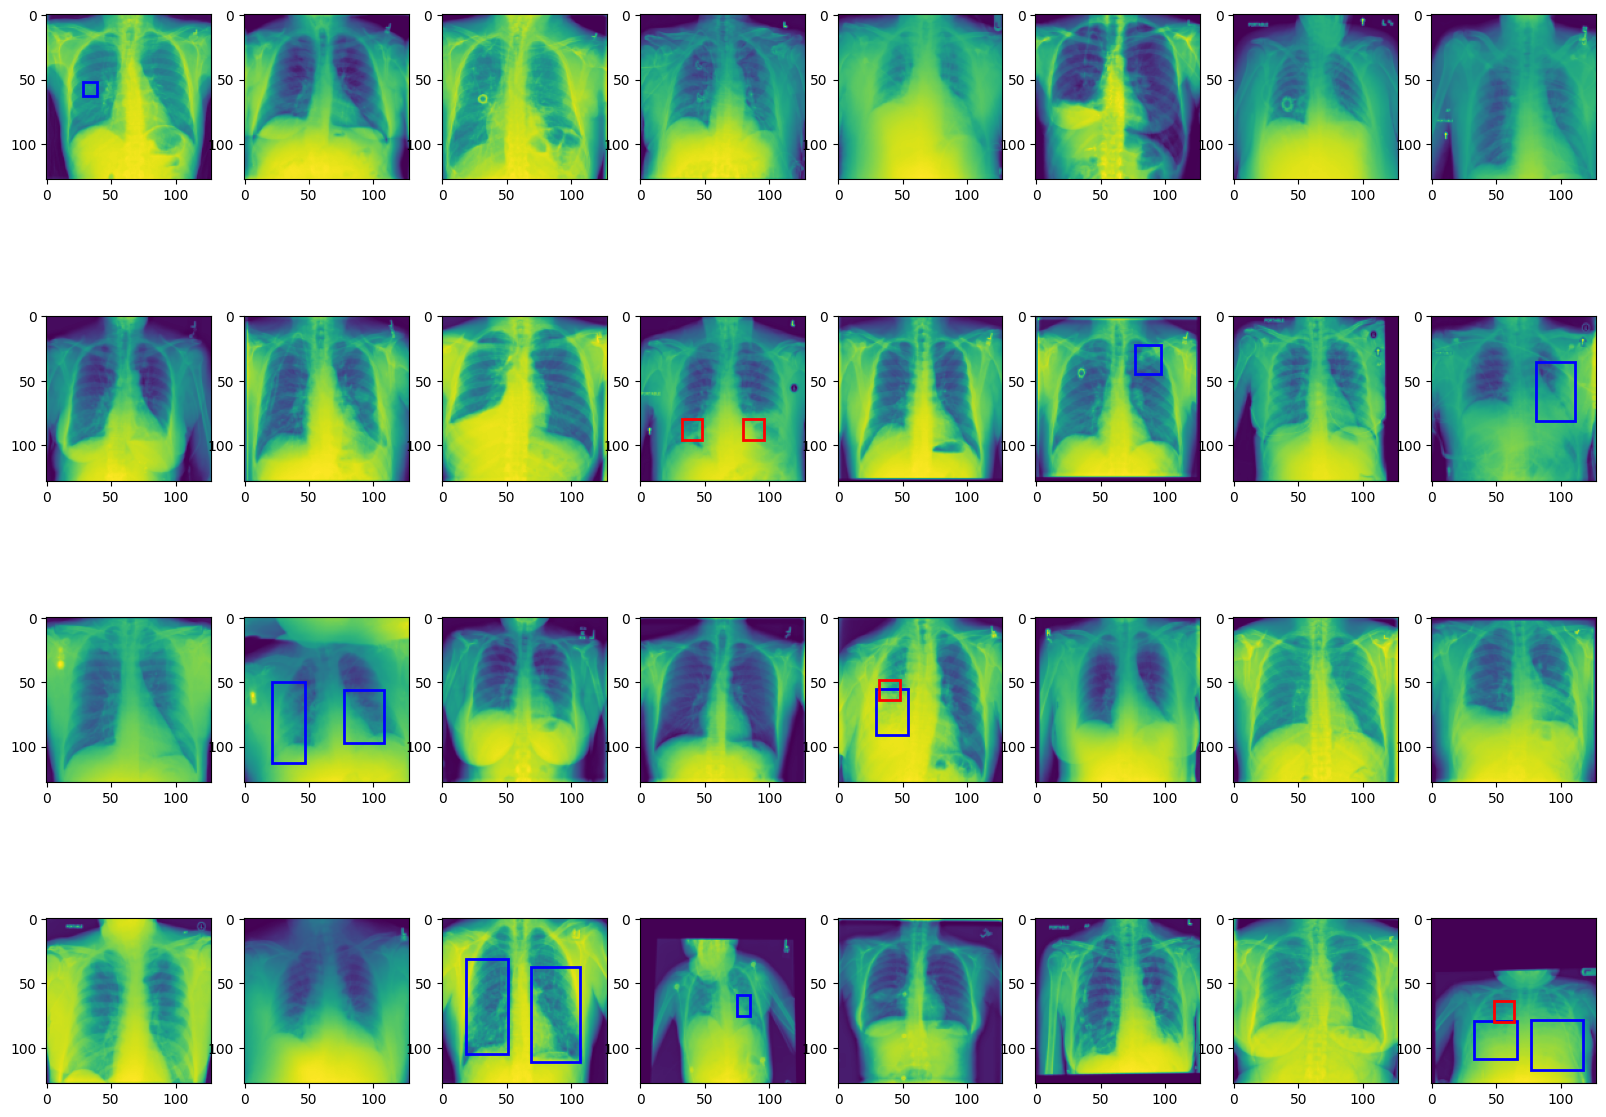

In [ ]:
i=0
for imgs, msks in valid_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # create figure
    f, axarr = plt.subplots(4, 8, figsize=(20,15))
    axarr = axarr.ravel()
    axidx = 0
    # loop through batch
    for img, msk, pred in zip(imgs, msks, preds):
        i=i+1
        #exit after 32 images
        if i>32:
            break
        # plot image
        axarr[axidx].imshow(img[:, :, 0])
        # threshold true mask
        comp = msk[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,
                                                     edgecolor='b',facecolor='none'))
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,
                                                     edgecolor='r',facecolor='none'))
        axidx += 1
    plt.show()
    # only plot one batch
    break

In [ ]:
model_save_path

'/content/drive/My Drive/AIML/Capstone Project/Pneumonia_model.h5'

In [ ]:
def post_process_predictions(pred):
    # Assuming pred is a binary mask, convert it to coordinates of the bounding box
    pred = pred.squeeze()  # Assuming your model outputs (batch_size, height, width, 1)
    coords = np.argwhere(pred > 0.5)  # Threshold the mask
    if len(coords) == 0:
        return "0 0 0 0"  # No pneumonia predicted
    ymin, xmin = np.min(coords, axis=0)
    ymax, xmax = np.max(coords, axis=0)
    return f"{xmin} {ymin} {xmax-xmin} {ymax-ymin}"


In [ ]:
import os
import pandas as pd
import pydicom
import numpy as np
from skimage.transform import resize
from keras.models import load_model

class TestGenerator:
    def __init__(self, folder, filenames, batch_size=32, image_size=256):
        self.folder = folder
        self.filenames = filenames
        self.batch_size = batch_size
        self.image_size = image_size
        self.index = 0
        self.max_index = len(filenames)

    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img

    def __getitem__(self):
        # select batch
        start = self.index
        end = min(self.index + self.batch_size, self.max_index)
        # load files
        filenames_batch = self.filenames[start:end]
        imgs = [self.__load__(filename) for filename in filenames_batch]
        # create numpy batch
        imgs = np.array(imgs)
        self.index += self.batch_size
        return imgs, filenames_batch

# Path to the test images folder
test_folder = '/content/drive/My Drive/AIML/Capstone Project/stage_2_test_images/stage_2_test_images'
test_filenames = os.listdir(test_folder)

# Initialize the test generator
test_gen = TestGenerator(test_folder, test_filenames, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)

# Load the trained model
#model = load_model('/path/to/your/trained/model.h5')

# Make predictions on test images
predictions, filenames = [], []
while test_gen.index < test_gen.max_index:
    imgs, filenames_batch = test_gen.__getitem__()
    preds_batch = model.predict(imgs)
    predictions.extend(preds_batch)
    filenames.extend(filenames_batch)

# Assuming you have a post-processing function post_process_predictions
# to convert model predictions into region information
regions_info = [post_process_predictions(pred) for pred in predictions]

# Create a DataFrame to store the results
results_df = pd.DataFrame({'image_id': filenames, 'PredictionString': regions_info})

# Save the results to a CSV file
results_df.to_csv('/content/drive/My Drive/AIML/Capstone Project/results.csv', index=False)


2/2 [==============================] - 0s 42ms/step


In [ ]:
print(results_df.head(10) )

                                   image_id PredictionString
0  2392af63-9496-4e72-b348-9276432fd797.dcm          0 0 0 0
1  2ce40417-1531-4101-be24-e85416c812cc.dcm          0 0 0 0
2  2bc0fd91-931a-446f-becb-7a6d3f2a7678.dcm          0 0 0 0
3  29d42f45-5046-4112-87fa-18ea6ea97e75.dcm          0 0 0 0
4  208e3daf-18cb-4bf7-8325-0acf318ed62c.dcm          0 0 0 0
5  20f708ac-0e1a-40fb-908c-5091f4a4c08d.dcm      48 16 63 63
6  1f75252b-2fff-4b7d-82cb-31189112f05b.dcm          0 0 0 0
7  1a926cbe-1654-43dd-949f-47bd7ca95bb1.dcm          0 0 0 0
8  0066ba32-08b6-4ac9-8d5a-abec69825d53.dcm          0 0 0 0
9  24e16db4-65a9-4e5e-81d1-701c8fae06ba.dcm          0 0 0 0
